#### Importing libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import MDAnalysis
import itertools
import glob

#### Set parameters fro MatplotLib

In [2]:
sns.set_theme(style="whitegrid", palette='Set1')

SMALL_SIZE = 7
MEDIUM_SIZE = 8.5
plt.ioff()
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#### Figure 3 (A)

Plotting data...


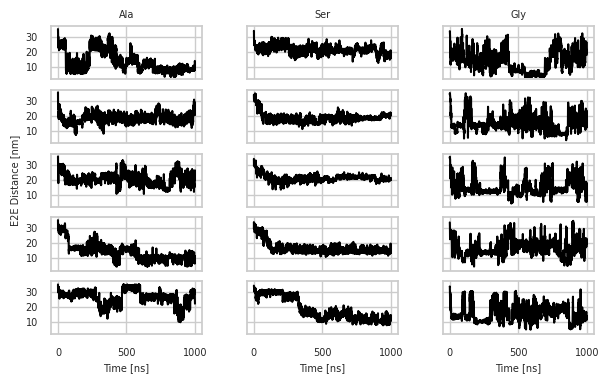

In [19]:
# Reading data
df = pd.read_csv(f"Figure3A.csv", index_col=0)
df.columns = [eval(col) for col in df.columns]


print('Plotting data...')

aux = df.T
experiments = []

# Initializing figure
fig, axs  = plt.subplots(ncols=3, nrows=5, figsize=(7,4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.3)

# Getting information from the indexes to segregate the data based on motion, sequence, or lr if needed.
for x in aux.index:
    aux.loc[[x], 'sequence'] = x[1].lower().capitalize()

# Change here between motion or sequence to have plot comparing sequences or the motions
for x, y in aux.groupby(['sequence']): 
    experiments.append(y)

for ex in experiments:        
    # Get some data for naming and legends
    sequence = str(ex['sequence'][0])

    if sequence == 'Gly':
        i = 2
    elif sequence == 'Ala':
        i = 0
    elif sequence == 'Ser':
        i = 1

    # Exclude columns used to group the data
    exclude = ['sequence']
    plot = ex.loc[:, ex.columns.difference(exclude)].T # Transpose it to plot


    # Plotting each individual eq trajectory
    for x in range(0,5):
        sns.lineplot(plot, x=plot.index, y=plot.iloc[:,x], ax=axs[x,i], color = 'black')
        axs[x,i].set_ylabel("") #Remove naming for each plot

    # Specific formatting depending on what type of analysis is in the dataframe
    axs[4,i].set_xticks([0, 1250, 2500])
    axs[4,i].set_xticklabels(['0', '500', '1000'])
    axs[4,i].set_xlabel("Time [ns]")
    axs[0,i].set_title(f'{sequence}')
    axs[2,0].set_ylabel("E2E Distance [nm]")
fig

#### Figure 3 (B)

Plotting data...


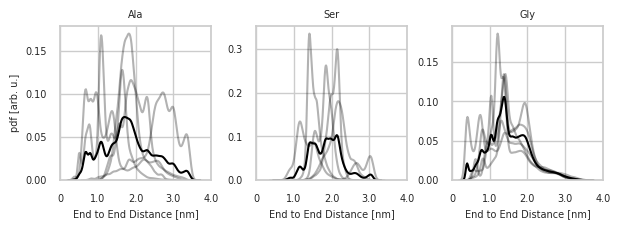

In [20]:
# Reading data
df = pd.read_csv(f"Figure3B.zip", index_col=0)
df.columns = [eval(col) for col in df.columns]
data = [df]

print('Plotting data...')

# Initializing figure
fig, axs  = plt.subplots(ncols=3, figsize=(7,2))
fig.subplots_adjust(wspace=0.3)

aux = df.T
experiments = []

# Getting information from the indexes
for x in aux.index:
    aux.loc[[x], 'sequence'] = x[1].lower().capitalize()

# Groupping by sequence for plotting
for x, y in aux.groupby(['sequence']): 
    experiments.append(y)

for ex in experiments: 
    # Storing sequence for naming
    sequence = ex.loc[ex[0].index, 'sequence'][0]

    if sequence == 'Gly':
        j = 2
    elif sequence == 'Ala':
        j = 0
    elif sequence == 'Ser':
        j = 1

    all_eq = []
    
    # Plotting individual pdf (for each equilibrium ensemble)
    for i, x in enumerate(ex.index):
        all_eq.append(list(ex.iloc[i, 50000:-3]))            
        sns.kdeplot(ex, x=ex.iloc[i, 50000:-3],  ax=axs[j], label = i, color = 'black', alpha = 0.3)

    all_eq = [item for sublist in all_eq for item in sublist]

    all_eq.sort()

    # Plotting the pdf of all ensembles
    sns.kdeplot(x=all_eq,  ax=axs[j], label = 'Average', color = 'black')
    
    # Some plot formatting
    axs[j].set_ylabel('')
    axs[j].tick_params(axis='both', which='major')
    axs[j].set_xlabel('End to End Distance [nm]')
    axs[j].set_xticks([0.0, 10.0, 20.0, 30.0, 40.0])
    axs[j].set_xticklabels(['0', '1.0', '2.0', '3.0', '4.0'])
    axs[j].set_title(f'{sequence}')

axs[0].set_ylabel('pdf [arb. u.]') 
fig.align_ylabels(axs[:])
fig

#### Figure 3 (C)

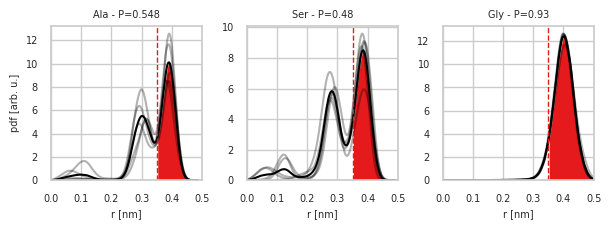

In [21]:
# Reading data
df = pd.read_csv(f"Figure3C.zip", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples

# Initializing figure
fig, axs  = plt.subplots(ncols=3, figsize=(7,2))
fig.subplots_adjust(wspace=0.3)

#These will be used to plot the pdf of all simulations per sequence
ala = [] 
ser = []
gly = []

for col in df:
    
    seq = col[0].split('.')[-3]
    
    if seq == '10Ala':
        j=0
        ala.append(df[col].tolist())
    elif seq == '10Ser':
        j=1
        ser.append(df[col].tolist())
    elif seq == '10Gly':
        j=2
        gly.append(df[col].tolist())
        
    sns.kdeplot(data=df[col], ax=axs[j], alpha=0.3, color='k') # Plotting individual distribution (each simulation)
    
ala = list(itertools.chain.from_iterable(ala)) # Joining the list of lists into one list
ser = list(itertools.chain.from_iterable(ser)) # Joining the list of lists into one list
gly = list(itertools.chain.from_iterable(gly)) # Joining the list of lists into one list

for j in [0,1,2]:
    
    if j == 0:
        dist = ala
        seq = 'Ala'
    elif j == 1:
        dist = ser
        seq = 'Ser'
    elif j ==2:
        dist = gly
        seq = 'Gly'
    
    sns.kdeplot(data=dist, ax=axs[j], color='k', label = 'avg') # Plotting pdf of all simulations of each sequence 
    axs[j].set_xlabel('r [nm]')
    axs[j].set_ylabel('')
    axs[j].set_xlim(0,0.5)
    
    # Get all the lines used to draw the density curve 
    kde_lines = axs[j].get_lines()[-1]

    kde_x, kde_y = kde_lines.get_data()

    # Use Numpy mask to filter the lines for region 
    # representing height greater than 0.35 nm
    mask = kde_x > 0.35
    filled_x, filled_y = kde_x[mask], kde_y[mask]

    # Shade the partial region 
    axs[j].fill_between(filled_x, y1=filled_y)

    # vertical line at x = 0.35 for reference
    axs[j].axvline(x=0.35, linewidth=1, linestyle='--')

    area = np.trapz(filled_y, filled_x)
    
    axs[j].set_title(f'{seq} - P={round(area, 3)}')
axs[0].set_ylabel('pdf [arb. u.]')
fig

#### Figure 4

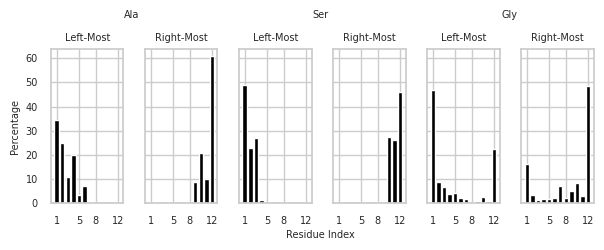

In [22]:
# Reading data
df = pd.read_csv(f"Figure4.csv", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples

# Initializing figure
fig, axs = plt.subplots(ncols = 6, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.3)

for col in df:
    
    # Adjusting the positioning in the panel
    seq = col[0]
    pos = col[1]
    
    if seq == 'Ala':
        if pos == 'Zmin':
            i = 0
        else:
            i = 1
    elif seq == 'Ser':
        if pos == 'Zmin':
            i = 2
        else:
            i = 3
    elif seq == 'Gly':
        if pos == 'Zmin':
            i = 4
        else:
            i = 5
            
    to_list = df[col].tolist() # Transform df to list      
    count = [(to_list.count(x)/len(df[col]))*100 for x in range(1,13)] # Count occurences of each residue index as extreme       
    
    # Plotting the percentage of frames with each residue index as extreme
    axs[i].bar(range(1,13), count, color = 'black')
    
    # Plot formatting
    axs[i].set_ylabel('')
    axs[i].set_xticks([1, 5, 8, 12])
    
    # Naming plot accordingly
    if pos == 'Zmax':
        axs[i].set_title('Right-Most')
    else:
        axs[i].set_title('Left-Most')

# Some plot formatting
axs[0].set_ylabel('Percentage')
fig.text(0.51, -0.05, 'Residue Index', ha='center', va='center')
fig.text(0.24, 1.05, 'Ala', ha='center', va='center')
fig.text(0.51,  1.05, 'Ser', ha='center', va='center')
fig.text(0.78, 1.05, 'Gly', ha='center', va='center')
fig

#### Figure 5

Plotting data...


/home/felipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


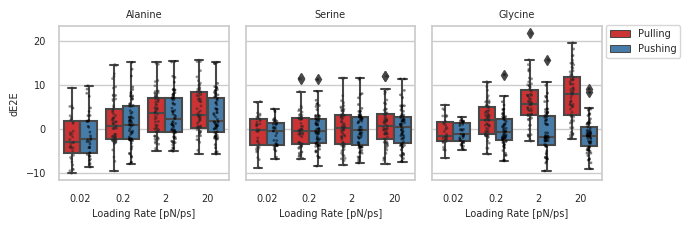

In [23]:
# Reading data
df = pd.read_csv(f"Figure5.zip", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples

print('Plotting data...')
   
# Setting up figure
fig, axs  = plt.subplots(ncols=3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.1)

aux = df.T
experiments = []

# Getting information from the indexes and adding to the df, this will be used to separate the plotting
for x in aux.index:
    if 'pulling' in x[2] or 'pushing' in x[2]:
        aux.loc[[x], 'motion'] = x[2].lower().capitalize()
        aux.loc[[x], 'loading_rate'] = x[3][:-4]
        aux.loc[[x], 'sequence'] = x[1].lower().capitalize()
    else:
        aux.loc[[x], 'motion'] = 'Equilibrium'
        aux.loc[[x], 'loading_rate'] = 'Eq'
        aux.loc[[x], 'sequence'] = x[1].lower().capitalize()

# Separating the df with respect to sequence
for x, y in aux.groupby(['sequence']): 
    experiments.append(y)

for ex in experiments: 
    seq = ex.loc[ex[0].index, 'sequence'][0] 
    
    # Plot separation
    if seq == 'Gly':
        sequence = 'Glycine'
        j = 2
    elif seq == 'Ala':
        sequence = 'Alanine'
        j = 0
    elif seq == 'Ser':
        sequence = 'Serine'
        j = 1

    # Taking the average value of E2E for each sequence on the equilibrium simulations (one value)
    for i, x in enumerate(ex.index):
        avg_eq = aux.query(f'loading_rate == "Eq" & sequence == "{seq}"').iloc[:, 250:-6].mean(axis=0).mean(axis=0)

        #Adding column with the difference between the last 50% avg and the Eq. value for each replicate
        if 'pulling' in x[2] or 'pushing' in x[2]:
            avg50 = float(ex.iloc[i, 1250:-6].mean(axis=0))
            ex.loc[[x], 'diff'] = float(avg50 - avg_eq)
    
    # Plotting the values into a boxplot and stripplot
    sns.stripplot(ex.iloc[:-5], x='loading_rate',  y='diff', hue = 'motion', dodge = True, ax=axs[j], jitter = 0.1, size=2, palette='dark:black', alpha=0.5, order=['0.02', '0.2', '2', "20"])
    sns.boxplot(x='loading_rate',  y='diff', hue = 'motion', data=ex.iloc[:-5], ax=axs[j], dodge=True, order=['0.02', '0.2', '2', "20"])
    
    # Plot formatting
    axs[j].set_ylabel('')
    axs[j].tick_params(axis='both', which='major')
    axs[j].set_xlabel('Loading Rate [pN/ps]')
    axs[j].set_title(f'{sequence}')
    axs[j].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('dE2E') 
fig.align_ylabels(axs[:])
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))
fig    

#### Figure 6A

Creating dataframe...
Plotting data...


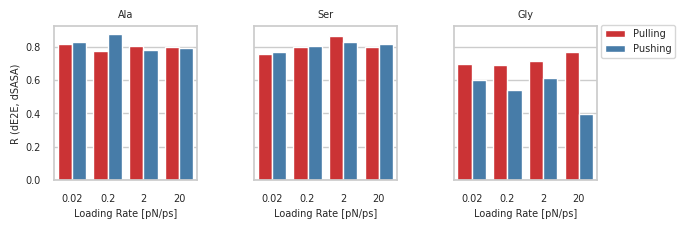

In [32]:
# Reading data
df = pd.read_csv(f"Figure6.E2E.zip", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples
# Reading data
df1 = pd.read_csv(f"Figure6.SASA.zip", index_col=0)
df1.columns = [eval(col) for col in df1.columns] #Changing the header back to tuples

data = [df, df1]

print('Creating dataframe...')

# Initiating variables
all_diffs = pd.DataFrame()
sasa_diffs = pd.DataFrame()
e2e_diffs = pd.DataFrame()

for i, item in enumerate(data):
    experiments = []
    
    aux = item.T
        
    
    # Getting information from the indexes to segregate the data 
    for x in aux.index:
        if 'pulling' in x[2] or 'pushing' in x[2]:
            aux.loc[[x], 'motion'] = x[2].lower().capitalize()
            aux.loc[[x], 'loading_rate'] = x[3][:-4]
            aux.loc[[x], 'sequence'] = x[1].lower().capitalize()
        else:
            aux.loc[[x], 'motion'] = 'Equilibrium'
            aux.loc[[x], 'loading_rate'] = 'Eq'
            aux.loc[[x], 'sequence'] = x[1].lower().capitalize()

    # Separating per sequence
    for x, y in aux.groupby(['sequence']): 
        experiments.append(y)

    for ex in experiments:
        # Storing loading rate and sequence to group data
        seq = ex.loc[ex[0].index, 'sequence'][0]
        lr = ex.loc[ex[0].index, 'loading_rate'][0]

        if seq == 'Gly':
            sequence = 'Glycine'
            j = 2
        elif seq == 'Ala':
            sequence = 'Alanine'
            j = 0
        elif seq == 'Ser':
            sequence = 'Serine'
            j = 1
            
        # Getting the average number of the metric for all equilibrium simulations of each sequence (one value)    
        avg_eq = aux.query(f'loading_rate == "Eq" & sequence == "{seq}"').iloc[:, 250:-6].mean(axis=0).mean(axis=0)

        for m, n in enumerate(ex.index):
            #Adding column with the difference between the last 50% avg and the Eq. value for each replicate
            if 'pulling' in n[2] or 'pushing' in n[2]:
                avg50 = float(ex.iloc[m, 1250:-6].mean(axis=0))
                if 'End-to-End' in n[0]:
                    ex.loc[[n], 'diff'] = float(avg50 - avg_eq)*0.1
                else:
                    ex.loc[[n], 'diff'] = float(avg50 - avg_eq)
        
        # Separating diffs into different dataframes
        if 'End-to-End' in n[0]:
            e2e_diffs = pd.concat([e2e_diffs, ex.query(f'loading_rate != "Eq"').loc[:,('diff', 'sequence', 'loading_rate', 'motion')]])
        if 'sasa' in n[0]:
            sasa_diffs = pd.concat([sasa_diffs, ex.query(f'loading_rate != "Eq"').loc[:,('diff', 'sequence', 'loading_rate', 'motion')]])

# Joining differences into one df           
all_diffs = pd.concat([e2e_diffs.reset_index(), sasa_diffs.reset_index()], ignore_index=True, axis=1).loc[:,(1,2,3,4,6)].rename(columns={1:'dE2E',2:'Seq',3:'Lr',4:'Motion', 6:'dSASA'})

# Calculating the correlation between the dE2E and dSASA

correlations = pd.DataFrame() # Initiating correlations df

for x, y in all_diffs.groupby(['Seq', 'Motion', 'Lr']): # Grouping by all experiment variables
    corr = y['dE2E'].corr(y['dSASA'], method='pearson') # Calculating correlation
    correlations[x] = [corr, y['Seq'].iloc[0], y['Lr'].iloc[0], y['Motion'].iloc[0]] # Filling dataframe with correlations and other information from experiment

correlations = correlations.T.rename(columns={0:'Correlation',1:'Seq',2:'LR',3:'Motion'}) # Fixing column naming and orientation

print('Plotting data...')

# Setting up figure
fig, axs  = plt.subplots(ncols = 3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.2)

# Separating per sequence for plotting
for nam, dat in correlations.groupby(['Seq']):
    if 'Ala' in nam:
        i = 0
    elif 'Ser' in nam:
        i = 1
    elif 'Gly' in nam:
        i = 2
    
    # Plotting the correlation in a barplot
    sns.barplot(data=dat, x='LR', y='Correlation', hue='Motion', ax=axs[i], order=['0.02','0.2','2','20'], errorbar=None)        
    
    # Some plot formatting
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major')
    axs[i].set_xlabel('Loading Rate [pN/ps]')
    axs[i].set_title(f'{nam}')
    axs[i].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('R (dE2E, dSASA)') 
fig.align_ylabels(axs[:])
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))
fig

#### Figure 6B

Creating dataframe...
Plotting data...


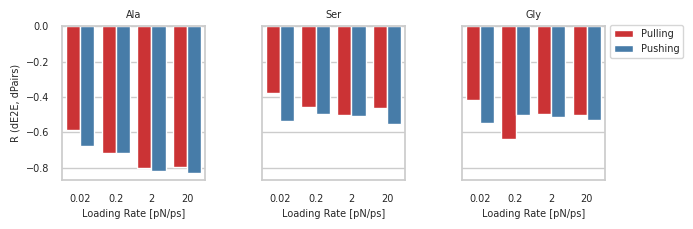

In [25]:
# Reading data
df = pd.read_csv(f"Figure6.E2E.zip", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples
# Reading data
df1 = pd.read_csv(f"Figure6.Pairs.zip", index_col=0)
df1.columns = [eval(col) for col in df1.columns] #Changing the header back to tuples
data = [df, df1]

print('Creating dataframe...')

# Initiating variables
all_diffs = pd.DataFrame()
pairs_diffs = pd.DataFrame()
e2e_diffs = pd.DataFrame()

for i, item in enumerate(data):
    experiments = []
    
    aux = item.T
        
    
    # Getting information from the indexes to segregate the data 
    for x in aux.index:
        if 'pulling' in x[2] or 'pushing' in x[2]:
            aux.loc[[x], 'motion'] = x[2].lower().capitalize()
            aux.loc[[x], 'loading_rate'] = x[3][:-4]
            aux.loc[[x], 'sequence'] = x[1].lower().capitalize()
        else:
            aux.loc[[x], 'motion'] = 'Equilibrium'
            aux.loc[[x], 'loading_rate'] = 'Eq'
            aux.loc[[x], 'sequence'] = x[1].lower().capitalize()

    # Separating per sequence
    for x, y in aux.groupby(['sequence']): 
        experiments.append(y)

    for ex in experiments:
        # Storing loading rate and sequence to group data
        seq = ex.loc[ex[0].index, 'sequence'][0]
        lr = ex.loc[ex[0].index, 'loading_rate'][0]

        if seq == 'Gly':
            sequence = 'Glycine'
            j = 2
        elif seq == 'Ala':
            sequence = 'Alanine'
            j = 0
        elif seq == 'Ser':
            sequence = 'Serine'
            j = 1
            
        # Getting the average number of the metric for all equilibrium simulations of each sequence (one value)    
        avg_eq = aux.query(f'loading_rate == "Eq" & sequence == "{seq}"').iloc[:, 250:-6].mean(axis=0).mean(axis=0)

        for m, n in enumerate(ex.index):
            #Adding column with the difference between the last 50% avg and the Eq. value for each replicate
            if 'pulling' in n[2] or 'pushing' in n[2]:
                avg50 = float(ex.iloc[m, 1250:-6].mean(axis=0))
                if 'End-to-End' in n[0]:
                    ex.loc[[n], 'diff'] = float(avg50 - avg_eq)*0.1
                else:
                    ex.loc[[n], 'diff'] = float(avg50 - avg_eq)
        
        # Separating diffs into different dataframes
        if 'End-to-End' in n[0]:
            e2e_diffs = pd.concat([e2e_diffs, ex.query(f'loading_rate != "Eq"').loc[:,('diff', 'sequence', 'loading_rate', 'motion')]])
        if 'hbonds' in n[0]:
            pairs_diffs = pd.concat([pairs_diffs, ex.query(f'loading_rate != "Eq"').loc[:,('diff', 'sequence', 'loading_rate', 'motion')]])

# Joining differences into one df           
all_diffs = pd.concat([e2e_diffs.reset_index(), pairs_diffs.reset_index()], ignore_index=True, axis=1).loc[:,(1,2,3,4,6)].rename(columns={1:'dE2E',2:'Seq',3:'Lr',4:'Motion', 6:'dPairs'})

# Calculating the correlation between the dE2E and dSASA

correlations = pd.DataFrame() # Initiating correlations df

for x, y in all_diffs.groupby(['Seq', 'Motion', 'Lr']): # Grouping by all experiment variables
    corr = y['dE2E'].corr(y['dPairs'], method='pearson') # Calculating correlation
    correlations[x] = [corr, y['Seq'].iloc[0], y['Lr'].iloc[0], y['Motion'].iloc[0]] # Filling dataframe with correlations and other information from experiment

correlations = correlations.T.rename(columns={0:'Correlation',1:'Seq',2:'LR',3:'Motion'}) # Fixing column naming and orientation

print('Plotting data...')

# Setting up figure
fig, axs  = plt.subplots(ncols = 3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.2)

# Separating per sequence for plotting
for nam, dat in correlations.groupby(['Seq']):
    if 'Ala' in nam:
        i = 0
    elif 'Ser' in nam:
        i = 1
    elif 'Gly' in nam:
        i = 2
    
    # Plotting the correlation in a barplot
    sns.barplot(data=dat, x='LR', y='Correlation', hue='Motion', ax=axs[i], order=['0.02','0.2','2','20'], errorbar=None)        
    
    # Some plot formatting
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major')
    axs[i].set_xlabel('Loading Rate [pN/ps]')
    axs[i].set_title(f'{nam}')
    axs[i].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('R (dE2E, dPairs)') 
fig.align_ylabels(axs[:])
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))
fig

#### Figure 7 (A)

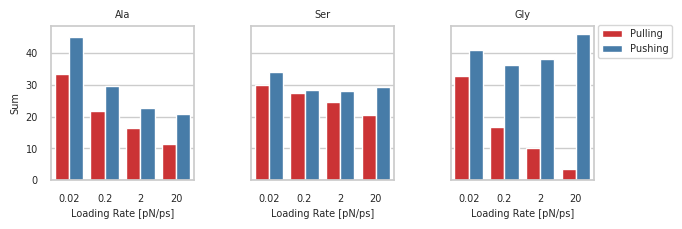

In [26]:
# Reading data
df = pd.read_csv(f"Figure7.csv", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples

# Setting up figure
fig, axs  = plt.subplots(ncols = 3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.2)

# Initiating variables
pos = []
seq = []
lr = []

# Iterating over indexes to retrieve information for plotting
for item in df.T.index:
    if item[1] == 'RM':
        pos.append('Pulling')
    elif item[1] == 'LM':
        pos.append('Pushing')
    seq.append(item[0].split('.')[0])
    if item[0].split('.')[2] == '02pNps':
        lr.append('0.02')
    elif item[0].split('.')[2] == '2pNps':
        lr.append('0.2')
    else: 
        lr.append(item[0].split('.')[1][:-4])

# Adding the information to the df
df = df.T
df['Sum'] = df.iloc[:,0:10].sum(axis=1) # Summing the percentage of frames that do not correspond to the extreme residues
df['Pos'] = pos
df['Seq'] = seq
df['LR'] = lr

# Separating per sequence for plotting
for nam, dat in df.groupby(['Seq']):
    if 'Ala' in nam:
        i = 0
    elif 'Ser' in nam:
        i = 1
    elif 'Gly' in nam:
        i = 2
    
    # Plotting the sum of the percentages in a barplot
    sns.barplot(data=dat, x='LR', y='Sum', hue='Pos', ax=axs[i], order=['0.02','0.2','2','20'], errorbar=None)        
    
    # Some plot formatting
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major')
    axs[i].set_xlabel('Loading Rate [pN/ps]')
    axs[i].set_title(f'{nam}')
    axs[i].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('Sum') 
fig.align_ylabels(axs[:])
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))
fig

#### Figure 7 (B)

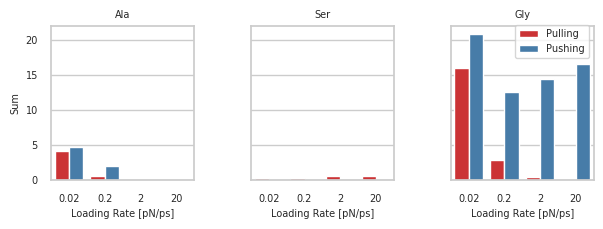

In [27]:
# Reading data
df = pd.read_csv(f"Figure7.csv", index_col=0)
df.columns = [eval(col) for col in df.columns] #Changing the header back to tuples

# Setting up figure
fig, axs  = plt.subplots(ncols = 3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.4, hspace=0.2)

# Initiating variables
pos = []
seq = []
lr = []

# Iterating over indexes to retrieve information for plotting
for item in df.T.index:
    if item[1] == 'RM':
        pos.append('Pulling')
    elif item[1] == 'LM':
        pos.append('Pushing')
    seq.append(item[0].split('.')[0])
    if item[0].split('.')[2] == '02pNps':
        lr.append('0.02')
    elif item[0].split('.')[2] == '2pNps':
        lr.append('0.2')
    else: 
        lr.append(item[0].split('.')[1][:-4])

# Adding the information to the df
df = df.T
df['Sum'] = df.iloc[:,0:8].sum(axis=1) # Summing the percentage of frames that do not correspond to the 3 extreme residues
df['Pos'] = pos
df['Seq'] = seq
df['LR'] = lr

# Separating per sequence for plotting
for nam, dat in df.groupby(['Seq']):
    if 'Ala' in nam:
        i = 0
    elif 'Ser' in nam:
        i = 1
    elif 'Gly' in nam:
        i = 2
       
    # Plotting the sum of the percentages in a barplot
    sns.barplot(data=dat, x='LR', y='Sum', hue='Pos', ax=axs[i], order=['0.02','0.2','2','20'], errorbar=None)        

    # Some plot formatting
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major')
    axs[i].set_xlabel('Loading Rate [pN/ps]')
    axs[i].set_title(f'{nam}')
    axs[i].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('Sum') 
fig.align_ylabels(axs[:])
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))  
fig

#### Figure 8

This step will calculate the difference in probability (from fpMD compared to equilibrium) of c-alpha atoms being at a distance larger than 0.35 nm of the center of the CNT. It will take some time and it will generate the all_areas list with two dataframes inside (areas of loading rates 20, 2, and 0.2 pN/ps and areas of 0.02 pN/ps loading rate). This list will be used to plot figure 8.

Calculating data...
Plotting data...


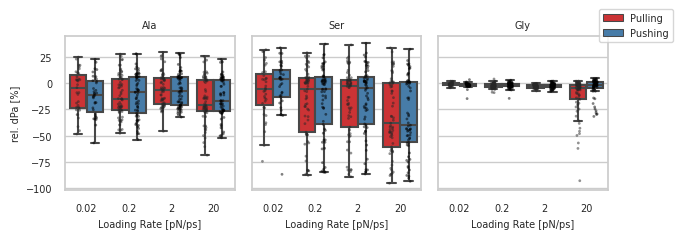

In [31]:
# The plots in this first section are generated in order to calculate the AUC (probability)
# of each replica and will not be displayed. Only the final boxplot will be displayed
#Reading data
df = pd.read_csv(f"Figure8.1.zip", index_col=0)
df1 = pd.read_csv(f"Figure8.2.zip", index_col=0)

aux_data = [df, df1]

print('Calculating data...')

all_areas = []

for item in aux_data: 
    areas = pd.DataFrame()
    aux = item.T
    experiments = []

    # Initializing figures to calculate the AUC of the pdf of the distance from the center of CNT for all C-alpha atoms
    fig, axs  = plt.subplots(ncols=3, nrows=2, figsize=(7,4))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    # Getting information from the indexes to group the data
    for x in aux.index:
        if 'pulling' in x.split('.')[1] or 'pushing' in x.split('.')[1]:
            aux.loc[[x], 'motion'] = x.split('.')[1].lower().capitalize()
            aux.loc[[x], 'sequence'] = x.split('.')[0].lower().capitalize()
            if x.split('.')[2] == '0':
                if x.split('.')[3] == '2pNps':
                    aux.loc[[x], 'loading_rate'] = '0.2'
                elif x.split('.')[3] == '02pNps':
                    aux.loc[[x], 'loading_rate'] = '0.02'
            else: 
                aux.loc[[x], 'loading_rate'] = x.split('.')[2][:-4]

    # Grouping by variables of the experiment
    for x, y in aux.groupby(['sequence', 'loading_rate', 'motion']): 
        experiments.append(y)

    for ex in experiments:
        if ex['sequence'][0] == 'Ala':
            j=0
        elif ex['sequence'][0] == 'Ser':
            j=1
        elif ex['sequence'][0] == 'Gly':
            j=2

        if ex['motion'][0] == 'Pulling':
            i=0
        elif ex['motion'][0] == 'Pushing':
            i=1

        for ind, item in enumerate(ex.T):
            
            sns.kdeplot(data=ex.loc[item][:-3], ax=axs[i,j], alpha=0.6, label = ex['loading_rate'][0]) 

            ############# Calculating the area (probability) from a threshold #######################

            # Get all the lines used to draw the density curve 
            kde_lines = axs[i,j].get_lines()[-1]
            kde_x, kde_y = kde_lines.get_data()

            # Use Numpy mask to filter the lines for region 
            # reresenting height greater than 0.35 nm 
            mask = kde_x > 0.35
            filled_x, filled_y = kde_x[mask], kde_y[mask]

            area = np.trapz(filled_y, filled_x)
            areas.loc[f"{ex['sequence'][0]}.{ex['loading_rate'][0]}.{ex['motion'][0]}",ind] = area
    all_areas.append(areas)
    
area_ala = 0.5479
area_ser = 0.4797
area_gly = 0.9296

for area in all_areas:
    for col in area.T:
        if 'Ala' in col:
            area.loc[col] = ((area.loc[col] - area_ala)/area_ala)*100
        elif 'Ser' in col:
            area.loc[col] = ((area.loc[col] - area_ser)/area_ser)*100
        elif 'Gly' in col:
            area.loc[col] = ((area.loc[col] - area_gly)/area_gly)*100

print('Plotting data...')

# Initializing figure
fig, axs  = plt.subplots(ncols=3, figsize=(7,2), sharey=True)
fig.subplots_adjust(wspace=0.1)

plot_all = pd.DataFrame()

for df in all_areas:
    for item in df.T:  
        # Getting information from the indexes and adding to the df, this will be used to separate the plotting
        df.loc[[item], 'sequence'] = item.split('.')[0]
        df.loc[[item], 'motion'] = item.split('.')[-1]
        if '0.2' in item:
            df.loc[[item], 'loading_rate'] = '0.2'
        elif '0.02' in item:
            df.loc[[item], 'loading_rate'] = '0.02'
        else: 
            df.loc[[item], 'loading_rate'] = item.split('.')[-2]    

        plot = df.loc[[item]].melt(id_vars=['loading_rate','motion', 'sequence']).set_index('variable')
        plot_all = pd.concat([plot_all, plot],axis=0)

for x, y in plot_all.groupby(['sequence']): 

    if x == 'Ala':
        j=0
    elif x == 'Ser':
        j=1
    elif x == 'Gly':
        j=2
    
    # Plotting the difference of probability in each replica in a boxplot and stripplot
    sns.stripplot(y, x='loading_rate',  y='value', hue = 'motion', dodge = True, ax=axs[j], jitter = 0.1, size=2, palette='dark:black', alpha=0.5, order=['0.02', '0.2', '2', "20"])
    sns.boxplot(y, x='loading_rate',  y='value', hue = 'motion', ax=axs[j], dodge=True, order=['0.02', '0.2', '2', "20"], showfliers=False)

    # Some plot formatting
    axs[j].set_ylabel('')
    axs[j].tick_params(axis='both', which='major')
    axs[j].set_xlabel('Loading Rate [pN/ps]')
    axs[j].set_title(f'{x}')
    axs[j].get_legend().set_visible(False)

# Plot final touches
axs[0].set_ylabel('rel. dPa [%]')
# Retrieve handles and labels to order the legend
handles, labels = axs[0].get_legend_handles_labels()
order = [0,1]
# pass handle & labels lists along with order as below
fig.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1, 1.04))
fig